In [117]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
import scipy.constants as constants
plt.rcParams['figure.figsize'] = [9, 7]

# ASO 2 Training: Beam Transport System
This notebook is the training guide for the "Beam Transport System" of the ASO2 manual.

# Solenoid Focusing
When an electron beam comes off a cathode, it immediately starts to rip itself apart.  Space charge and RF forces defocus the beam, blowing it up to a level unusable for for LCLS.  An external 'lens' needs to be used to counteract this defocusing.

A common technique for radially focusing low energy electron beams is to use a solenoid.  The electron beam enters the solenoid with a radius $r_0$, and comes out with a smaller radius $r_1$, where $r_1 < r_0$.  This technique is sometimes called "emittance compensation".  Lets explore how this works!

Lets say our solenoid starts at z = 0 and has length L.  Outside the solenoid, at z < 0 or z > L, there is no field, and particles travel in a straight line.  Inside, the solenoid, 0 < z < L, there's a uniform field $B_z(z) = B_0$ along the z axis.

Lets assume we have a beam with zero thermal emittance - that is, all particles come off the cathode with some longitudinal velocity $v_z$, and that $v_x$ and $v_y$ are zero.  This isn't really true, but its not too far off: the beam is being accelerated along the z axis, so $v_z >> v_x$ and $v_z >> v_y$.  Lets also assume that there's no space charge, i.e. the electrons don't repel each other (this isn't true either, but it will make the discussion much simpler.  We can talk about how space charge modifies things later.)

Okay, so every particle has $v_z$, and we have a b-field only in the z direction.  $F = -e * v \times B = 0$, since $v_z$ is parallel with $B_z$.  The particles experience no force at all, nothing happens, and I've wasted your time.

But wait!  Very close to the entrance and exit of the solenoid, at z == 0 and z == L, our assumptions aren't right: there are fringe fields with a radial component, that we can approximate as:

$B_r(z) = -\frac{r}{2} * B_0$ for z==0, and

$B_r(z) = \frac{r}{2} * B_0$ for z==L.

Thes radial fringe fields at the entrance and exit kick the beam:

$F = -e v \times B = -e v_z B_r$ .

From here you can figure out that as the electrons enter the solenoid they get a velocity in the azimuthal direction:

$v_\theta = r_0 \frac{e B_0}{2 \gamma m_e}$.  We can define the "Larmour frequency" $\omega_L = \frac{e B_0}{2 \gamma m_e}$.  This is the frequency with which the electrons rotate around the axis of the solenoid.

(where $r_0$ is the radial coordinate of the electron, i.e. how far from the center of the solenoid it is)

That $v_\theta$ term means that the solenoid's axial field $B_z$ *will* have some effect on the beam!

$F = -e v \times B = F_r = -e v_\theta B_z$

...we get a force in the radial direction, i.e. towards the center of the solenoid!

### Electron motion in the solenoid
Below is a cool little plot where you can see the positions of four electrons as they travel through the solenoid.  Drag the 'z' slider around to see the electron positions from z=0 (solenoid entrance) to some arbitrary position in the solenoid.

In [118]:
@interact(z=(0.0, .1, 0.004))
def plot_particle_in_solenoid(z=0):
    r_0 = np.ones(5)
    B_0 = 2.5 # in kG.  This is the axial field strength
    theta_0 = np.linspace(0.0, 2*constants.pi, 5)
    #print(r_0, theta_0)
    gamma = 6/0.511 # Lorentz Factor, (Particle energy)/(Rest Energy)
    larmour_freq = constants.elementary_charge*B_0/(2*gamma*constants.electron_mass)
    beta = np.sqrt(1 - (1/gamma)**2)
    v_z = beta * constants.speed_of_light
    r = r_0*np.cos(larmour_freq * z / v_z)
    theta = theta_0 + (larmour_freq * z)/v_z
    ax = plt.subplot(111, projection='polar')
    ax.plot(theta[0], r[0], 'ro')
    ax.plot(theta[1], r[1], 'go')
    ax.plot(theta[2], r[2], 'bo')
    ax.plot(theta[3], r[3], 'co')
    ax.set_rmax(1.0)
    ax.set_rticks([0.25, 0.5, 0.75, 1.0])
    plt.show()

interactive(children=(FloatSlider(value=0.0, description='z', max=0.1, step=0.004), Output()), _dom_classes=('…

You can see from this plot that there's a point where you've focused the beam as much as possible, and then it blows back up again.  If we had an infinitely long solenoid, the beam would periodically focus and defocus.  And remember - this is just from the solenoid field, we're ignoring space charge (which is why there's a spot where you can get all the electrons riiight on top of each other).

When you exit the solenoid, the _exit_ fringe field produces a convenient kick that exactly cancels out the azimuthal velocity from the entry fringe field - so you end up with 
$v_r = v_\theta = 0$, $v_z$ is unaffected, and, if the solenoid length/field strength is the right value, you'll end up focusing the beam!


### Adding in space charge
Space charge effects are Coulomb repulsion: the electrons in the beam repel one another.  In the radial axis, that force looks like this:

$F_r = 2 \frac{m c^{2} I r}{\beta \gamma^{2} I_A R^{2}}$

where $R$ is the beam's radius.  This force counteracts some of the radial focusing we saw earlier:

$F_{focusing} = -e \omega_{L} B_z r$

As the beam gets focused in the solenoid, and its radius decreases, there's eventually a point where these two forces cancel each other out.  I haven't done the math, but that should give a maximum amount of focusing you can achieve.

### Adding in termal emittance
The real beam comes off the cathode with some non-zero transverse velocity.  The velocity of each electron is random, coming from some distribution.  That just "blurs things out" a little - some electrons will experience a stronger focusing effect, others will experience weaker focusing.

### References
The entire solenoid section was written based on an extremely good paper I found:

*Understanding the focusing of charged particle beams in a solenoid magnetic field*, V. Kumar, Beam Physics and Free Electron Laser Laboratory, Raja Ramanna Centre for Advanced Technology, Indore, 452013 India.  (https://aapt-scitation-org.stanford.idm.oclc.org/doi/pdf/10.1119/1.3129242)


## Bucking Coil
The focusing solenoid field isn't actually zero before entering the solenoid.  The field leaks out a bit, and electrons experience it right at the surface of the cathode.  Another solenoid, called the bucking coil, is used to cancel that field.  From the [LCLS Physics Requirements For Bucking Coil of Gun Solenoid](https://www-ssrl.slac.stanford.edu/lcls/PRD/1.2-022-r0.pdf), the cathode sees a field from the focusing solenoid of about 22 Gauss.  Without the bucking coil to cancel it out, this would increase the emittance by 0.28 mm-mrad - quite a bit!

# Dipole Magnets
Dipole magnets are one of the simpler tools in the accelerator physics toolbox.  The simplest way to think of dipole magnets are a [Helmholtz coil](https://en.wikipedia.org/wiki/Helmholtz_coil) - two coils of wire spaced apart on the same axis, fed by a DC power supply.  This produces a (nearly) uniform magnetic field between the coils.

If the direction of the field is perpendicular to the direction the electron beam is travelling, the beam's trajectory gets bent by the field.

Here's a fun little demo: It sets up a beam travelling in the z direction.  The beam encounters a field of strength B_0 between z=0 and z=2.  You can use the sliders to play with the beam's velocity and the field strength, and watch the trajectory change.

In [119]:
from scipy.integrate import odeint

@interact(B_0=(0,0.5,0.03), v0=(70.0, 200.0, 20))
def plot_bend(B_0=0.3, v0=90.0):
    #Initial trajectory
    z_0, vz_0, x_0, vx_0 = (-1.0, v0, 0, 0)
    #Uniform field in Y axis between z=0 and z=1, no field elsewhere.
    def B_y(z, x):
        #print("B_y was passed (z, x) = ({},{})".format(z, x))
        if z>=0 and z<=2:
            return B_0
        else:
            return 0.0

    def deriv(X, t):
        """Compute the derivative of the state vector X (z, dz/dt, x, dx/dt)"""
        z, dz, x, dx = X
        B = B_y(z, x)
        ddz = 1/0.01 * (dx * B)
        ddx = 1/0.01 * (-dz * B)
        return dz, ddz, dx, ddx

    # Draw field region
    cN = 100
    zgrid = np.linspace(0, 2, cN)
    xgrid = np.linspace(-6, 10 ,cN)
    Z, X = np.meshgrid(zgrid, xgrid)
    # Draw markers representing the magnetic field coming out of the plane of the plot.
    plt.scatter(Z[::cN//10, ::cN//5], X[::cN//10, ::cN//5], marker='o', edgecolors='gray', s=200, c='white')
    plt.scatter(Z[::cN//10, ::cN//5], X[::cN//10, ::cN//5], marker='.', c='gray')


    X_0 = (z_0, vz_0, x_0, vx_0)
    t = np.arange(0, 10, 0.001)
    sol = odeint(deriv, X_0, t)
    z, _, x, _ = sol.T
    plt.xlim(-1, 6)
    plt.ylim(-5, 6)
    plt.plot(z, x)

interactive(children=(FloatSlider(value=0.3, description='B_0', max=0.5, step=0.03), FloatSlider(value=90.0, d…

Dipole magnets used to alter the beam trajectory get categorized into a few different types at SLAC: bend, correctors, and kickers.

## Bend Magnets
These guys are the heavy hitters.  Bend magnets are usually very large, iron core electromagnets used to deflect the beam when the beam pipe changes direction.

### Iron Cores
You need extremely strong magnetic fields to bend the beam.  Strong fields take a lot of current flowing through the magnet coils.  That current makes a ton of heat, and dissipating that heat is the limiting factor in how strong we can make the field.

Because iron has a much higher [magnetic permeability](https://en.wikipedia.org/wiki/Permeability_(electromagnetism)) than air, it captures and concentrates the magnetic field lines produced by the coils.  This makes the magnet hundreds of times stronger than if it had no core.

### Hysteresis
Iron cores have one big drawback though - they keep some residual magnetization after the coils have been shut off.  This residual field means that if you lower the magnet's BDES in the control system, the actual field at the coils is slightly higher than the setpoint you specified.  This 'memory effect', where the magnet's new field strength depends on its old field strength, is called hysteresis.

We can counteract hysteresis using standardization - a process where we cycle the magnet from minimum to maximum strength a few times, then, starting from the minimum field, trim to our desired setpoint.  This way, we always approach our desired strength from the same point in history.

F. J. Decker has an interesting paper about standardization [here](https://www.slac.stanford.edu/pubs/slacpubs/5250/slac-pub-5483.pdf).

Another issue with the residual field is that if we want to turn the magnet off entirely, we can't do that by just turning the power supply off.  You need to degauss the magnet.  Degaussing cycles the magnet strength up and down with decreasing amplitude, until it settles with zero actual field.  It is rare that we actually need to do this - the seeding chicanes are the most commonly degaussed magnets.

## Trim Windings
In some cases, we install 'trim windings' on large magnets (bends, usually, but ocassionally quads have trims too).  The trims are used to make small corrections to field strengths.  Why not just adjust the main coils?  One reason is that the large DC power supplies used to power bends often don't have very fine-grained adjustability - the minimum step size when changing the current might be bigger than the correction you'd like to make.  Trims run on independent, smaller power supplies with better current resolution.

Another reason is to adjust for field errors in the main coils, so that the actual field at the magnet matches the bend magnet setpoint.  This is particularly useful for magnets where we use 'GeV/c' units - that way, we can scale the bend to a particular energy, and know that means a beam of that energy will be bent the right amount.

## Correctors
Correctors are smaller dipoles, usually (always?) _without_ iron cores.  These are used to compensate for local misalignments of the beam pipe, so that the beam travels through the center of the quadrupoles.  Because they don't have iron cores, they typically don't need standardization or degaussing.

## Kickers
So far we have discussed DC magnets.  These are great, but you can't turn them off or change their strength very quickly (it takes on the order of one second).  We often require pulse-by-pulse control of the beam's trajectory, and for that, we can use pulsed dipole magnets, which we usually call 'kickers'.  (Pulsed quads used to exist in the PEP-II days, but haven't been used since then.)

### Lambertons (AKA septum magnets)
Kickers *must* be air core in order to shut on and off quickly enough, and this limits their possible strength.  For very shallow bends, that is fine, but for larger bend angles, we complement the kicker with a special type of DC magnet called a Lambertson, or septum.  These DC magnets have a clever design with two regions: a *field-free* region where the beam will sail right through, and a *bend* region that will strongly bend the beam.  The two regions are separated only by a very thin sheet, so a kicker magnet can easily divert the beam into one region or the other.

### Kickers in LCLS
There are a few specific examples of kickers that exist in LCLS: BYKIK, BYKIKS, and BKRCUS.
BYKIK (in the LTUH line) and BYKIKS (in the LTUS line) are kickers that are used to send the beam into two permanent tune-up dumps (TDKIK and TDKIKS).  BYKIK and BYKIKS are both tied into the Machine Protection System, so that we can have full rate in the linac, but then limit the amount of beam that gets past the kickers into their respective undulator line.  Neither of these two magnets need a septum.

BKRCUS is a kicker that can be used to kick the beam from the main linac into the SXR line.  BKRCUS is used in conjunction with a septum called "BLRCUS" (the "L" stands for Lambertson!).

## Wigglers and Undulators
Both wigglers and undulators use several permanent dipole magnets (not electromagnets), arranged with alternating polarities, so that the beam bends in a zig-zag path.  Each bend in this path creates a little bit of [synchrotron radiation](https://en.wikipedia.org/wiki/Synchrotron_radiation).

The main difference between wigglers and undulators is the period of the alternating magnets - undulators have a much shorter period than wigglers.  This changes the wavelength of the synchrotron light.  You can often change the "gap" (the distance between magnet pole tips) for wigglers and undulators to adjust the strength of each tiny bend.  A detailed discussion of undulator physics is out of the scope of this training, but is very interesting.



# Quadrupole Magnets
Quadrupole magnets are an extremely important part of the accelerator, they act as magnetic lenses that focus the beam - counteracting the beam's natural tendency to spread out due to repulsion between electrons.

Using magnets to focus the beam is tricky - [Earnshaw's theorem](https://en.wikipedia.org/wiki/Earnshaw%27s_theorem) states that you can't have a local minima in the magnetic potential, only saddle points.  That mean's you can't design a magnet that produces a DC field that can focus the beam in both the X and Y axes at the same time.

We can work around Earnshaw's theorem by alternating focusing in the X and Y axes.

Here's a plot of the field a quadrupole magnet generates.  In this plot, the magnet coils are at the four corners.
The second plot is just the opposite polarity of the first one.

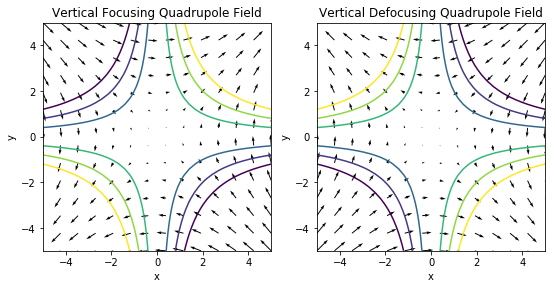

In [130]:
fig, (ax1,ax2)=plt.subplots(1,2)
ax1.set_aspect('equal')
ax2.set_aspect('equal')
xlist = np.linspace(-5.0, 5.0, 40)
ylist = np.linspace(-5.0, 5.0, 40)
X, Y = np.meshgrid(xlist, ylist)
Zn = X*Y

ax1.set_title('Vertical Focusing Quadrupole Field')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax2.set_title('Vertical Defocusing Quadrupole Field')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
qf_contours =ax1.contour(X, Y, Zn, [-6,-4,-2,2,4,6])
qd_contours =ax2.contour(X, Y, -Zn, [-6,-4,-2,2,4,6])
ax1.quiver(X[::3,::3], Y[::3,::3], Y[::3,::3], X[::3,::3])
ax2.quiver(-X[::3,::3], -Y[::3,::3], Y[::3,::3], X[::3,::3])

### How does this field focus the beam?
You can see from the plot that the absolute field strength is zero in the center, and increases as you get further out.  An electron that is perfectly on axis will therefore get no kick from the field, and electrons get an increasingly large kick as they get further and further away from the center.

Look at the field plot on the left: using the right-hand rule, you can see that a particle at the coordinate (0, -4) will get a kick in the +Y direction.  A particle at (0, 4) will get a kick in the -Y direction.  In summary, this field will kick vertically displaced particles back towards the center.  For a beam, this would look like a *vertical focusing* effect.

A particle at the coordinate (-4, 0) will get kicked in the -X direction: even further away from the center!  Similarly, a particle at the coordinate (4, 0) will get kicked in the +X direction.  So this field produces *horizontal defocusing*.

The field plot on the right is the opposite: it focuses in the horizontal plane, and defocuses in the vertical.